[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



**Problem 2**. Analyze the Carbon_West data file using the following code.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")
from sklearn.linear_model import LinearRegression

Part a. Construct a histogram of CO2 emissions.

      Nation   CO2
0    Albania   2.0
1  Australia  15.4
2    Austria   6.9
3    Belgium   8.3
4     Bosnia   6.2
Index(['Nation', 'CO2'], dtype='object')


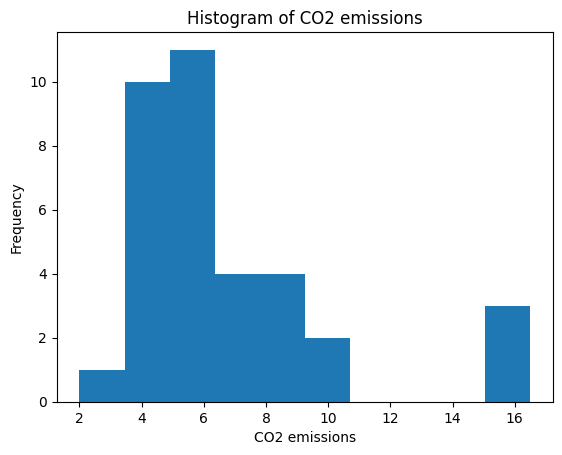

In [3]:
print(carbon_west.head())
print(carbon_west.columns)
emissions = carbon_west['CO2']
plt.hist(emissions)
plt.xlabel("CO2 emissions")
plt.ylabel("Frequency")
plt.title("Histogram of CO2 emissions")
plt.show()


Part b. Find the mean, median, and standard deviation.

In [4]:
mean = np.mean(emissions)
median = np.median(emissions)
std = np.std(emissions)
print("Mean: ", mean)
print("Median: ", median)
print("Standard Deviation: ", std)

Mean:  6.717142857142858
Median:  5.9
Standard Deviation:  3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [20]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

:Part a. Find the mean and standard deviation for murders without D.C.

In [35]:
murdersNoDc = murders[murders['state'] != 'DC']
murderRates = murdersNoDc['murder']

meanMurder = np.mean(murderRates)
stdMurder = np.std(murderRates)

print("No D.C murder mean: ", meanMurder)
print("No D.C std deviation: ", stdMurder)


No D.C murder mean:  4.874
No D.C std deviation:  2.560297638947472


Part b. Find the five-number  summary without D.C.

In [36]:
x = murderRates
minimum = np.min(x)
q1 = np.percentile(x, 25)
median = np.median(x)
q3 = np.percentile(x, 75)
maximum = np.max(x)
print("Minimum: ", minimum)
print("Q1: ", q1)
print("Median: ", median)
print("Q3: ", q3)
print("Maximum: ", maximum)

Minimum:  1.0
Q1:  2.625
Median:  4.85
Q3:  6.175
Maximum:  12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [68]:
x = murders['murder']
minimum = np.min(x)
q1 = np.percentile(x, 25)
median = np.median(x)
q3 = np.percentile(x, 75)
maximum = np.max(x)
range = maximum - minimum
iqr = q3 - q1
print("Minimum: ", minimum)
print("Q1: ", q1)
print("Median: ", median)
print("Q3: ", q3)
print("Maximum: ", maximum)
print("Range: ", range)
print("IQR: ", iqr)


Minimum:  1.0
Q1:  2.6500000000000004
Median:  5.0
Q3:  6.45
Maximum:  24.2
Range:  23.2
IQR:  3.8


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [55]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")
print(houses.columns)

Index(['case', 'price', 'size', 'new', 'taxes', 'bedrooms', 'baths'], dtype='object')


Part a. Construct a scatterplot between square feet and price of a home.

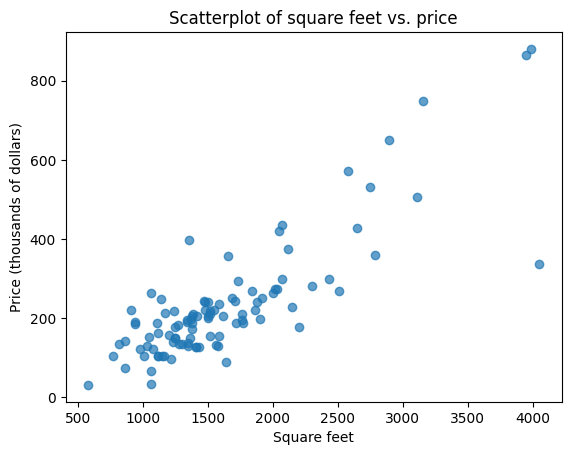

In [46]:
x = houses['size']
y = houses['price']
plt.scatter(x, y, alpha = .7)
plt.xlabel("Square feet")
plt.ylabel("Price (thousands of dollars)")
plt.title("Scatterplot of square feet vs. price")
plt.show()


Part b. Find the correlation between the two variables.

In [50]:
correlation = x.corr(y)
print("Correlation:", correlation)


Correlation: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

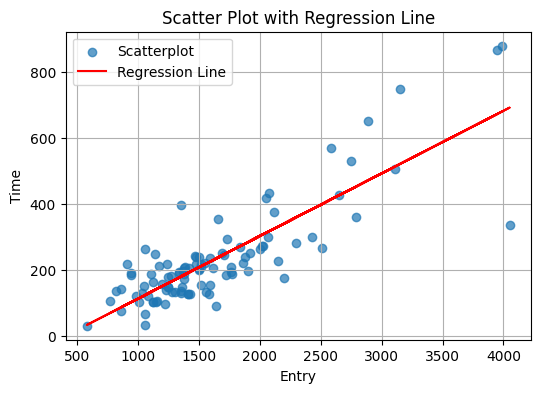

In [53]:
x = houses[['size']]
y = houses['price']

model = LinearRegression()
model.fit(x, y)


plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.7, label='Scatterplot')

# Plot the regression line
plt.plot(x, model.predict(x), color='red', label='Regression Line')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('Entry')
plt.ylabel('Time')
plt.legend()
plt.grid(True)
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

<Figure size 800x600 with 0 Axes>

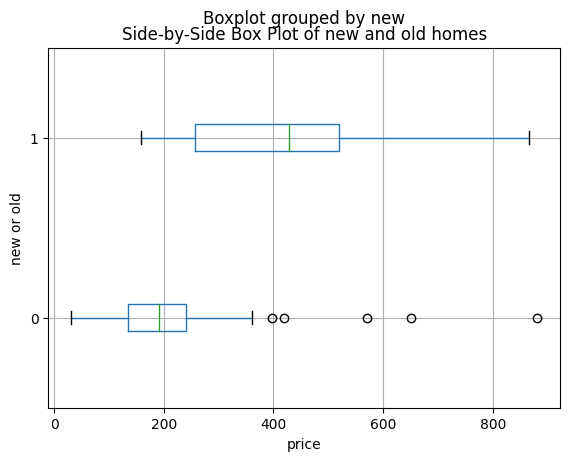

In [59]:
plt.figure(figsize=(8, 6))
houses.boxplot(column='price', by='new', vert=False)
plt.title('Side-by-Side Box Plot of new and old homes')
plt.xlabel('price')
plt.ylabel('new or old')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

If a house is new, it is likely to be more expensive. We can see this clearly as the lowest price of a new house is almost at the median of the old houses.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [77]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")
print(happy['marital'])

0       male
1       male
2       male
3       male
4       male
        ... 
2137      fe
2138      fe
2139      fe
2140      fe
2141      fe
Name: marital, Length: 2142, dtype: object


In [78]:
pd.crosstab(happy['marital'], happy['happiness'])

happiness,1,1 1,1 2,1 3,2,2 1,2 2,2 3,3,3 1,3 2,3 3
marital,,,,,,,,,,,,
fe,348,0,0,0,642,0,0,0,153,0,0,0
fem,0,5,0,0,0,0,0,0,0,0,0,0
mal,0,107,33,56,0,229,114,210,0,33,45,68
male,0,99,0,0,0,0,0,0,0,0,0,0
